In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

In [2]:
path=r"C:\Users\win10\Desktop\DATA SCIENCE\ExcelR\Assignment Given (Untouched)\10)Decision Tree\Company_Data.csv"

In [3]:
path=path.replace('\\', '/')

In [4]:
df=pd.read_csv(path)

In [5]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


# Initial Observations
1)No missing values
2)3 categorical columns found


In [8]:
df["ShelveLoc"].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [9]:
df["Urban"]=df["Urban"].map({"Yes":1, "No":0})

In [10]:
df["ShelveLoc"]=df["ShelveLoc"].map({"Bad":0, "Medium":1,"Good":2})

In [11]:
df["US"]=df["US"].map({"Yes":1, "No":0})

In [12]:
# Lets convert the sales (Target Variable) into Categorical Variable

In [13]:
df=pd.DataFrame(df)

In [14]:
df["Sales_cat"]=""

In [93]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.554458,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.038549,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.053465,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.056552,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.020614,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.050924,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.554458,0.038549,-0.053465,0.056552,-0.020614,0.050924,1.000000,0.014149,-0.025723,-0.075404,0.047378
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.014149,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,-0.025723,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.075404,0.028479,-0.033094,1.000000,0.047085


In [16]:

for i in range (0,len(df)):
    if df.Sales[i]<df.Sales.mean():
        df.Sales_cat[i]=0   # 0 Indicates low_sales 
    else:
        df.Sales_cat[i]=1   # 1 Inddicates High_sales


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
df.Sales_cat  # This column represents the Highsales & LowSales in 1 & 0 respectively

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales_cat, Length: 400, dtype: object

In [18]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [19]:
df = df.iloc[:,[11,0,1,2,3,4,5,6,7,8,9,10]]

In [20]:
df.head()

,Sales_cat,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,0,42,17,1,1
1,1,11.22,111,48,16,260,83,2,65,10,1,1
2,1,10.06,113,35,10,269,80,1,59,12,1,1
3,0,7.40,117,100,4,466,97,1,55,14,1,1
4,0,4.15,141,64,3,340,128,0,38,13,1,0


#  Assigning  Target & Predictor Variable 

In [21]:
X=df.drop(["Sales_cat","Sales"], axis=1)

In [22]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [23]:
type(X)

pandas.core.frame.DataFrame

In [24]:
y=df.Sales_cat

In [25]:
type(y)

pandas.core.series.Series

In [26]:
y=y.astype('int64')

In [27]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Sales_cat, dtype: int64

# Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [30]:
X_train.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
336,138,35,6,60,143,0,28,18,1,0
64,100,67,12,184,104,1,32,16,0,1
55,143,81,5,60,154,1,61,18,1,1
106,102,33,0,217,139,1,70,18,0,0
300,116,78,1,158,99,1,45,11,1,1


In [31]:
print(X_train.shape,X_test.shape,y_test.shape,y_train.shape,)

(320, 10) (80, 10) (80,) (320,)


In [32]:
from sklearn.tree import DecisionTreeClassifier


In [33]:
cltree=DecisionTreeClassifier(max_depth=5)

In [34]:
cltree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
y_train.iloc[5].dtype

dtype('int64')

In [36]:
y_train_pred=cltree.predict(X_train)
y_test_pred=cltree.predict(X_test)

In [37]:
y_test_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

# Model Performance 

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [39]:
acc_score=accuracy_score(y_test,y_test_pred)

In [40]:
acc_score

0.6875

In [41]:
con_matrix=confusion_matrix(y_test,y_test_pred)

In [42]:
con_matrix

array([[24, 11],
       [14, 31]], dtype=int64)

# Plotting Decision Tree

In [43]:
dot_data=tree.export_graphviz(cltree,out_file=None,feature_names=X_train.columns, filled=True)

In [44]:
from IPython.display import Image

In [45]:
import pydotplus

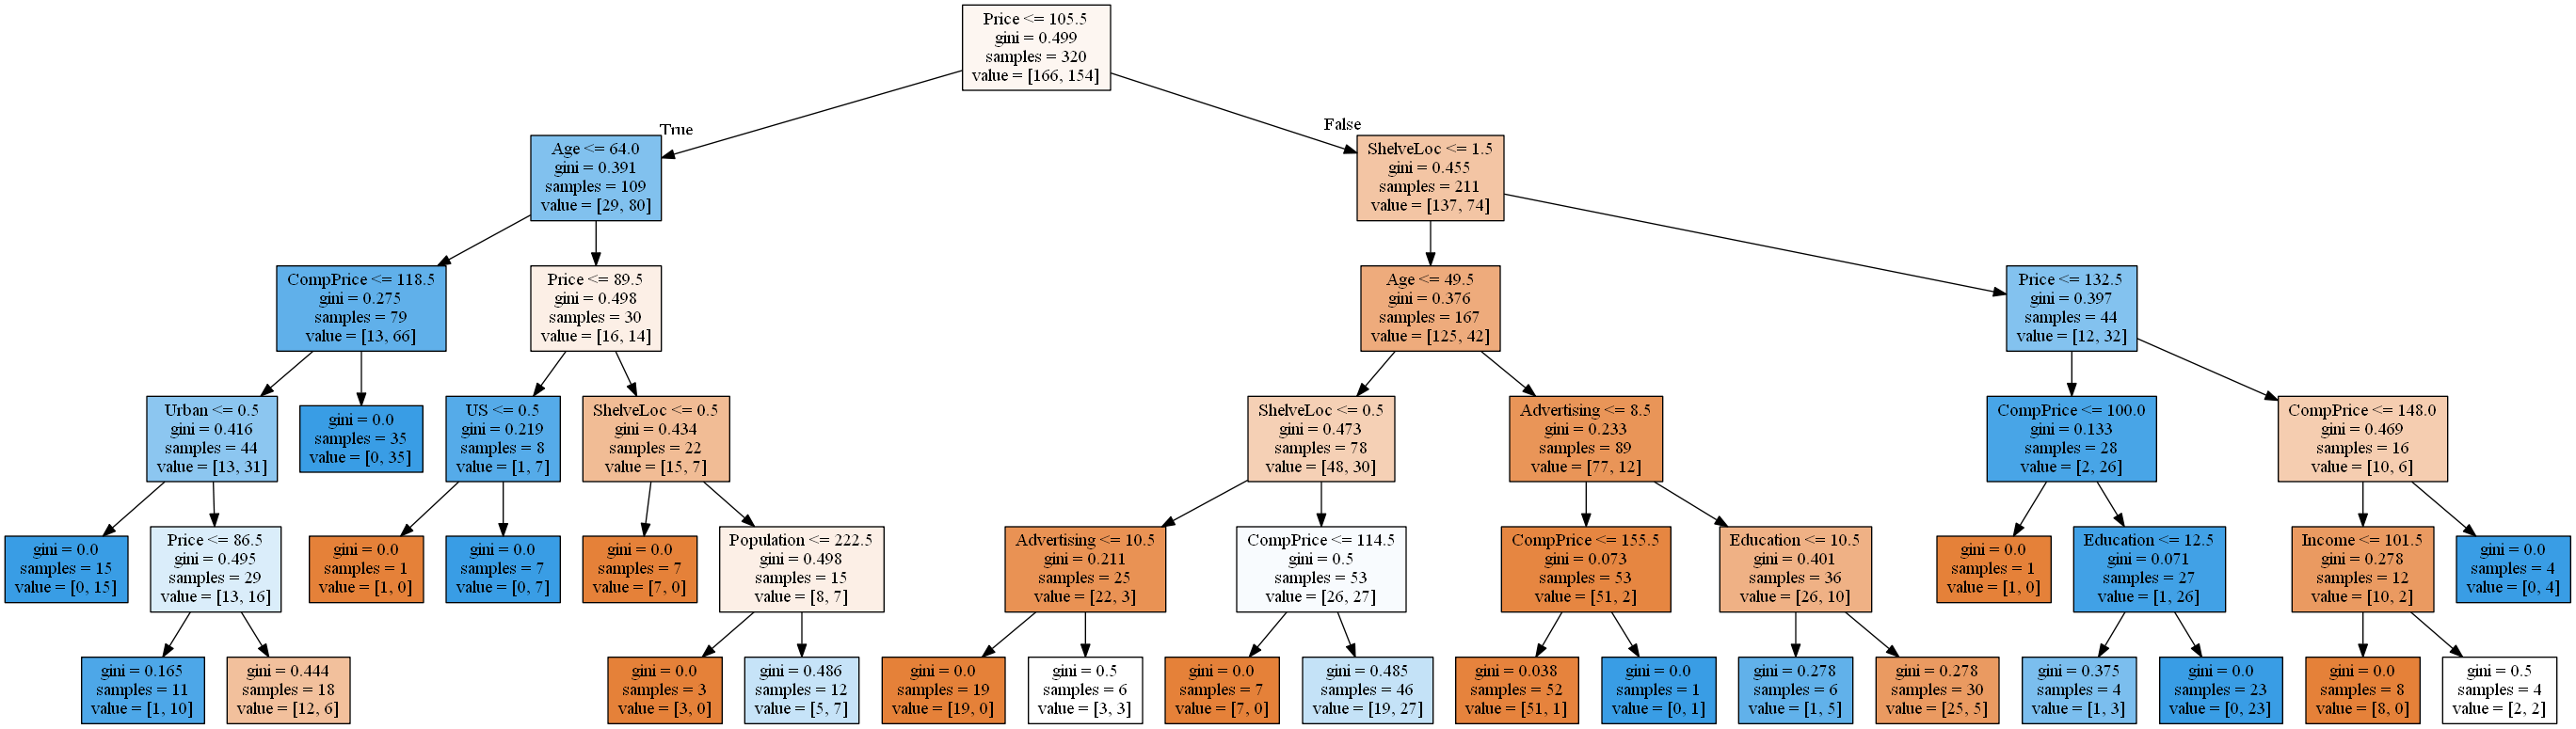

In [46]:
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Controlling tree growth

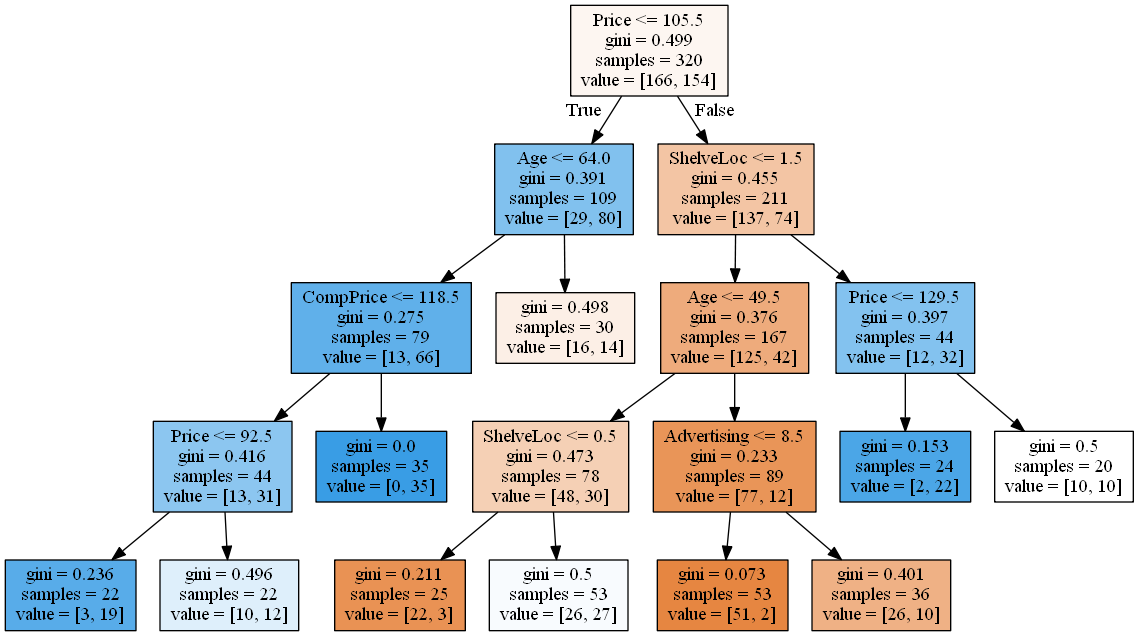

In [47]:
cl2tree=DecisionTreeClassifier(max_depth=4,min_samples_leaf=20)
cl2tree.fit(X_train,y_train)
dot_data=tree.export_graphviz(cl2tree,out_file=None,feature_names=X_train.columns, filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Bagging

In [48]:
clftree=DecisionTreeClassifier()


In [49]:
from sklearn.ensemble import BaggingClassifier

In [50]:
bag_clf=BaggingClassifier(base_estimator=clftree,n_estimators=1000,bootstrap=True,random_state=42, n_jobs=-1)

In [51]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [52]:
confusion_matrix(y_test,bag_clf.predict(X_test))

array([[30,  5],
       [10, 35]], dtype=int64)

In [1]:
accuracy_score(y_test,bag_clf.predict(X_test))

NameError: name 'accuracy_score' is not defined

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand_class=RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)

In [ ]:
rand_class.fit(X_train,y_train)

In [ ]:
accuracy_score(y_test,rand_class.predict(X_test))

In [ ]:
confusion_matrix(y_test,rand_class.predict(X_test))

# Grid Search

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
rfclf=RandomForestClassifier(random_state=42,n_estimators=250)

In [61]:
param_grid={"max_features":[4,5,6,7,8,9,10],
                        "min_samples_split":[2,3,10]}

In [62]:
grid_search=GridSearchCV(rfclf,param_grid,n_jobs=-1,cv=5, scoring='accuracy')

In [63]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=250, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [64]:
grid_search.best_params_

{'max_features': 4, 'min_samples_split': 3}

In [65]:
grid_search.best_score_

0.809375

In [66]:
cvrf_clf=grid_search.best_estimator_

In [67]:
accuracy_score(y_test,cvrf_clf.predict(X_test))

0.8375

In [68]:
confusion_matrix(y_test,cvrf_clf.predict(X_test))

array([[31,  4],
       [ 9, 36]], dtype=int64)

# Gradient Boosting

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
gb_clf=GradientBoostingClassifier()

In [71]:
gb_clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [72]:
accuracy_score(y_test,gb_clf.predict(X_test))

0.8125

In [73]:
gb_cl2=GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000,max_depth=1)
gb_cl2.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [74]:
accuracy_score(y_test,gb_cl2.predict(X_test))

0.8375

# Applying Grid Search

In [75]:
gb_cl3=GradientBoostingClassifier()

In [76]:
param={"learning_rate":[0.01,0.1],
       "n_estimators":[500,750,1000],
      "max_depth":[1,2,3,4,5],}

In [77]:
grid_search_gBoost=GridSearchCV(gb_cl3,param,n_jobs=-1,cv=5, scoring='accuracy')

In [78]:
grid_search_gBoost.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [79]:
grid_search_gBoost.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=750,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [80]:
grid_search_gBoost.best_score_

0.8625

# Applying ADA Boost

In [81]:
from sklearn.ensemble import AdaBoostClassifier

In [82]:
adclf=AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [83]:
adclf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.02,
                   n_estimators=5000, random_state=None)

In [84]:
accuracy_score(y_test,adclf.predict(X_test))

0.875

In [85]:
adclf2=AdaBoostClassifier(rfclf,learning_rate=0.02, n_estimators=500)

In [86]:
adclf2.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [87]:
accuracy_score(y_test,adclf2.predict(X_test))

0.8625

In [88]:
from xgboost import XGBClassifier
import xgboost as xgb

In [89]:
xgb_clf= XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3, n_jobs=-1 )

In [90]:
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
accuracy_score(y_test,xgb_clf.predict(X_test))

0.775

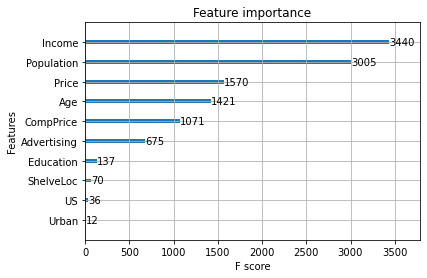

In [92]:
xgb.plot_importance(xgb_clf)